In [2]:
import pandas as pd
import os


# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime

In [3]:
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
#file_name='MyGlobalPort_Mar-08Jun22.csv'
file_name='Tech-Cypto-World.csv'
today=datetime.datetime.today()

from_month_str='2022-06-01'
to_month_str= today.strftime("%Y-%m-%d")



print(from_month_str)
print(to_month_str)

2022-06-01
2022-08-06


In [4]:
col_corr=['close']
col_key='Ticker'
col_datetime='Date/Time'

In [5]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col=col_datetime,parse_dates=[col_datetime],dayfirst=True)

In [6]:
dfAll

,Ticker,open,high,low,close,volume
Date/Time,,,,,,
2022-06-21,ACWI,83.34,84.08,83.25,83.76,4832300.0
2022-06-22,ACWI,82.77,84.14,82.56,83.28,3650800.0
2022-06-23,ACWI,83.62,83.91,82.77,83.76,3691000.0
2022-06-24,ACWI,84.61,86.34,84.61,86.31,3355000.0
2022-06-27,ACWI,86.54,86.61,85.88,86.06,4133600.0
...,...,...,...,...,...,...
2022-07-29,QQQ,311.39,316.39,309.93,315.46,57433300.0
2022-08-01,QQQ,313.65,318.81,312.53,315.27,46358800.0
2022-08-02,QQQ,312.92,318.55,311.84,314.33,48676500.0


In [7]:



df=dfAll.loc[from_month_str:to_month_str,:]

df=df[[col_key]+col_corr]

list_symbol=df[col_key].unique().tolist()
print(list_symbol)

# list_symbol=['82823.HK', 'ACWI', 'EEM', 'IXJ', 'QQQ']
# list_symbol=[ 'ACWI', 'IXJ', 'QQQ','BTC-USD','ETH-USD']

['ACWI', 'ETH-USD', 'QQQ']


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_7636\453779772.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=dfAll.loc[from_month_str:to_month_str,:]


In [8]:
df.head()

,Ticker,close
Date/Time,,
2022-06-21,ACWI,83.76
2022-06-22,ACWI,83.28
2022-06-23,ACWI,83.76
2022-06-24,ACWI,86.31
2022-06-27,ACWI,86.06


In [9]:
df.tail()

,Ticker,close
Date/Time,,
2022-07-29,QQQ,315.46
2022-08-01,QQQ,315.27
2022-08-02,QQQ,314.33
2022-08-03,QQQ,322.89
2022-08-04,QQQ,324.40


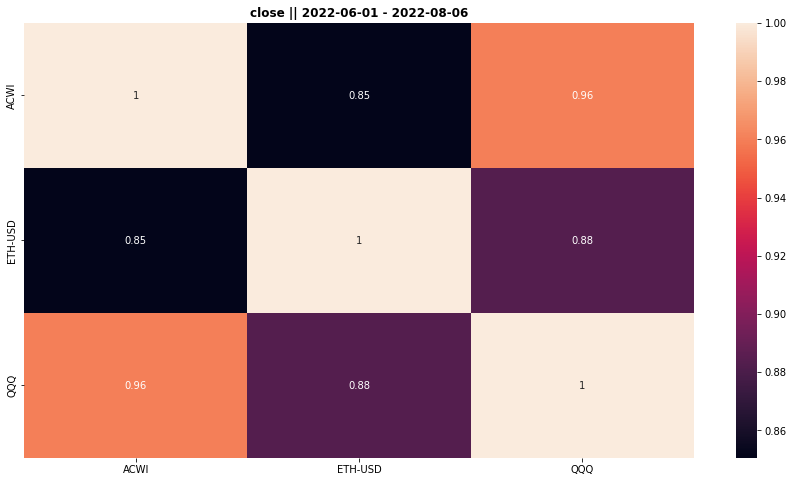

In [10]:


for col in col_corr:  
    pd_corr=pd.DataFrame()
    for symbol in list_symbol:

      df_by_symbol=df.query(f'{col_key}==@symbol')[[col]]
      df_by_symbol=df_by_symbol.rename(columns={col:symbol})   
      #print(df_by_symbol)  
      pd_corr=pd.concat([pd_corr, df_by_symbol], axis=1)
        
    corrMatrix = pd_corr.corr()
    plt.figure(figsize = (15,8))
    plt.title(f'{col} || {from_month_str} - {to_month_str}',fontweight ="bold")
    
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    
#     print(pd_corr)